In [ ]:
!pip install geopandas fiona shapely

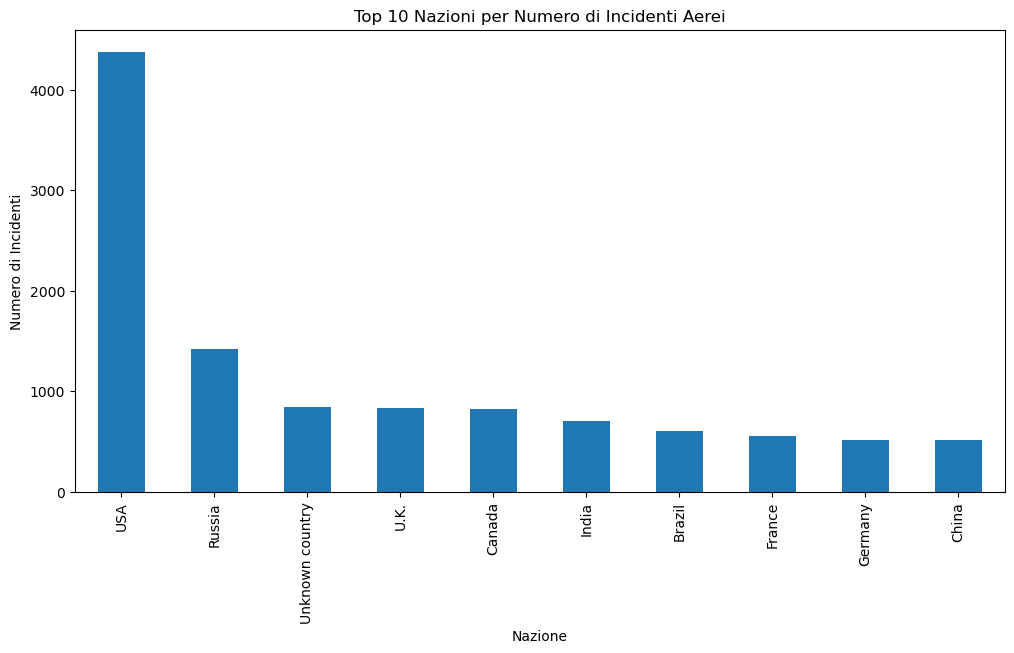

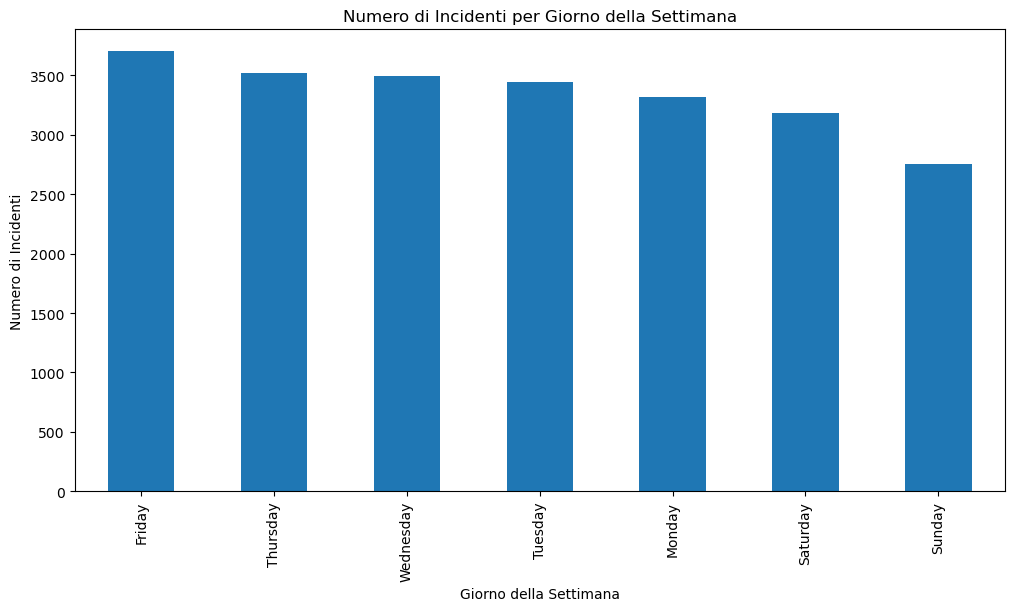

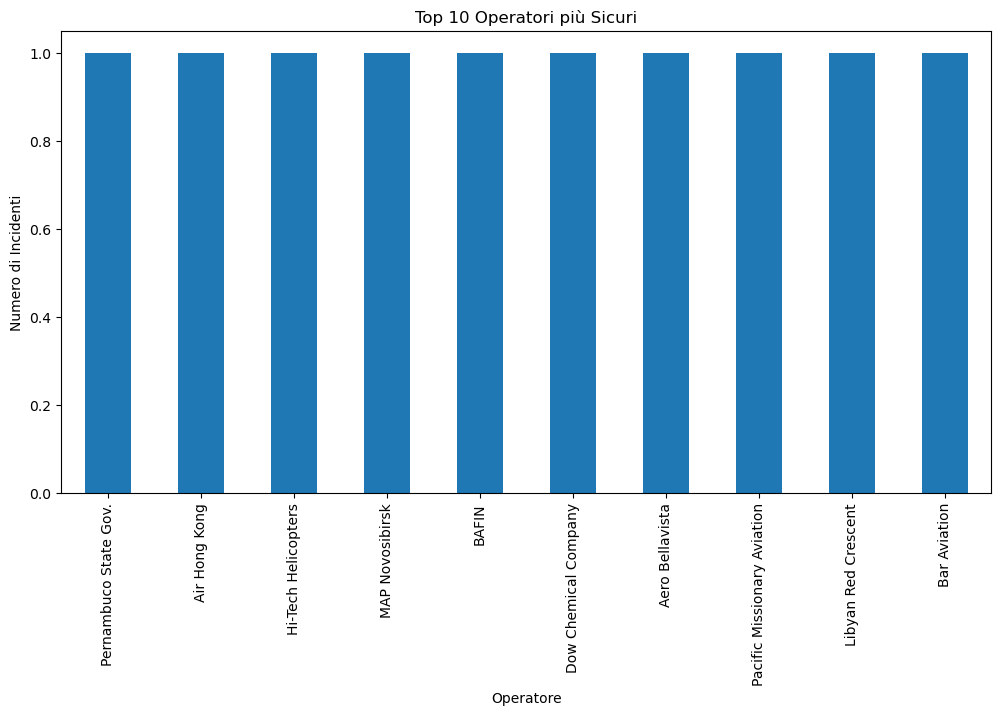

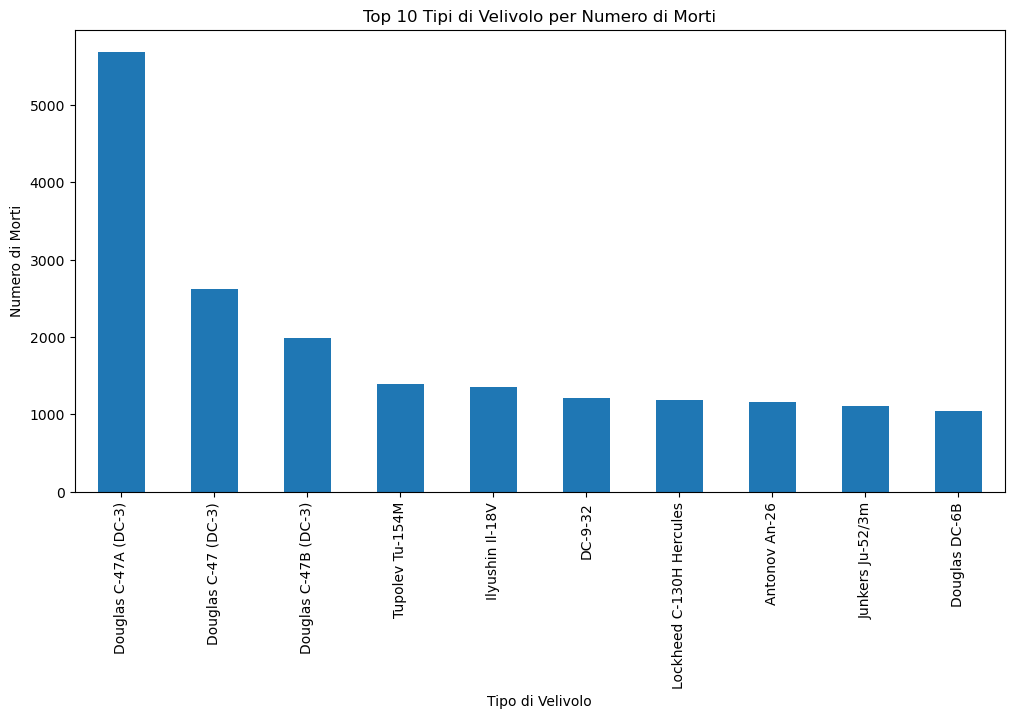

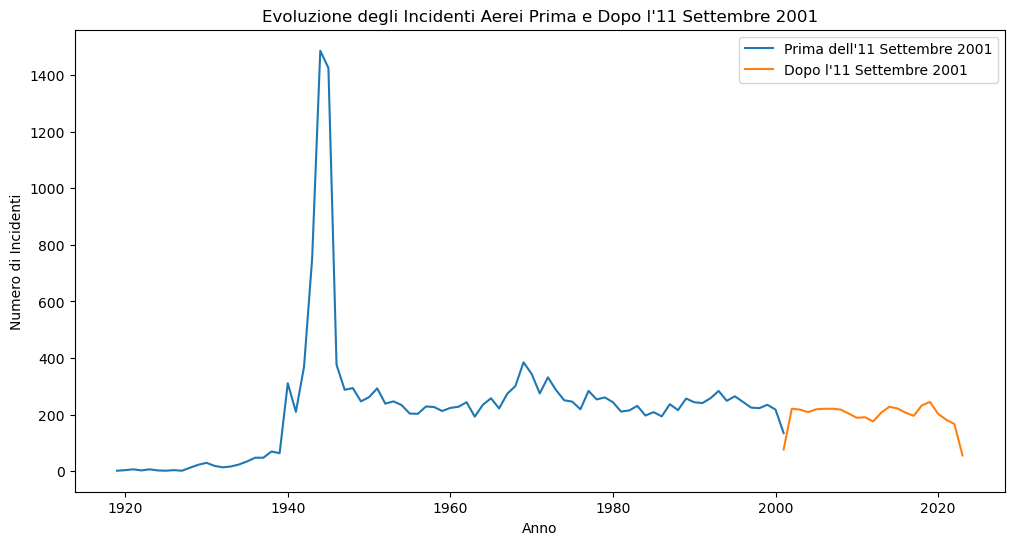

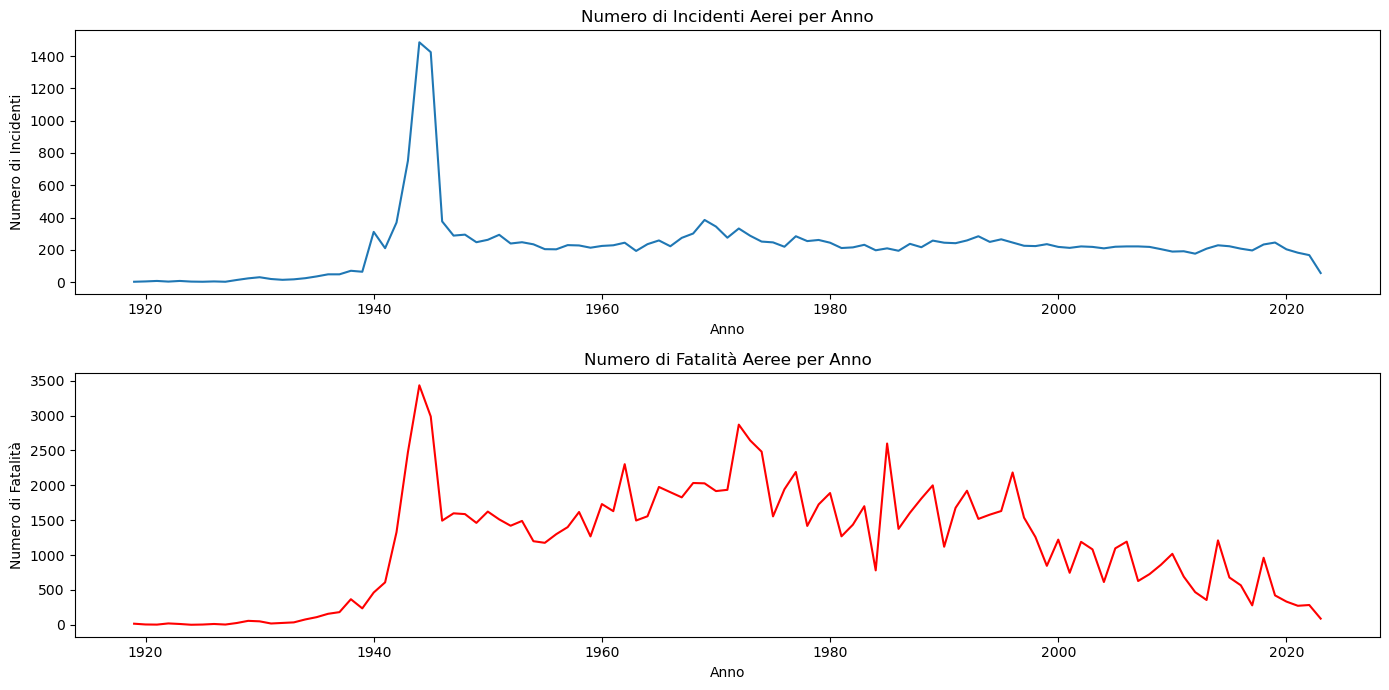

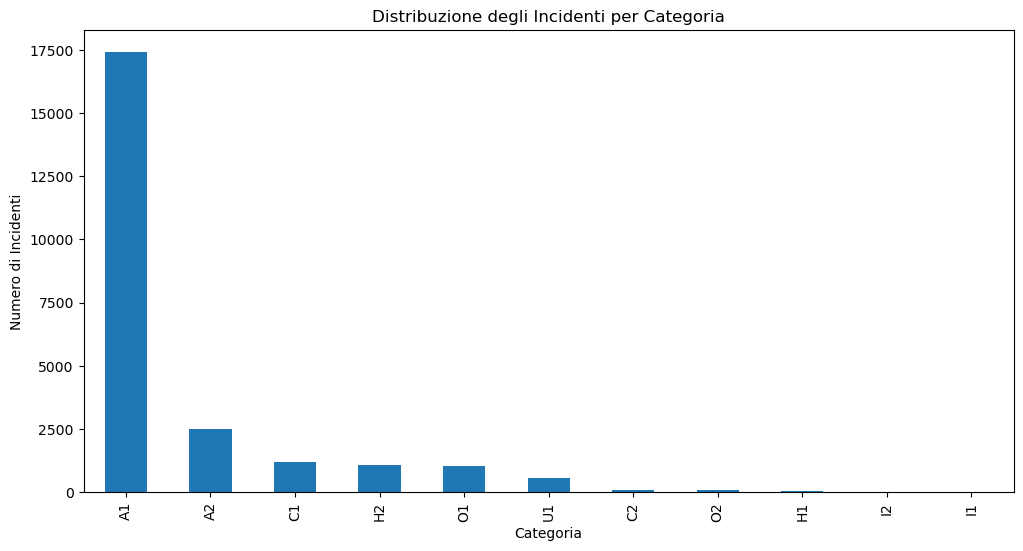

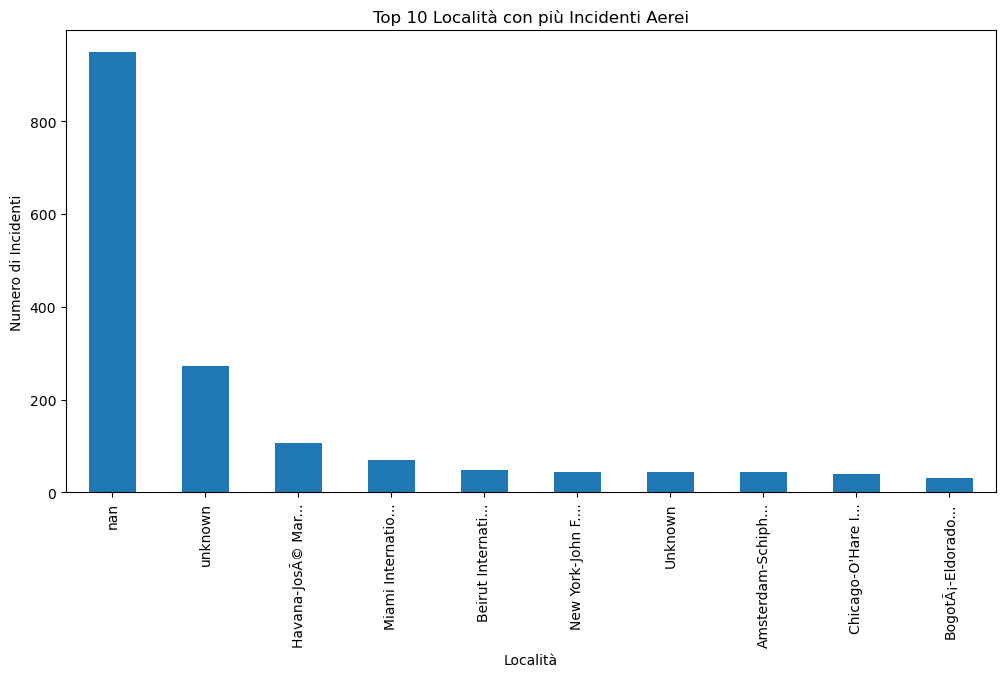

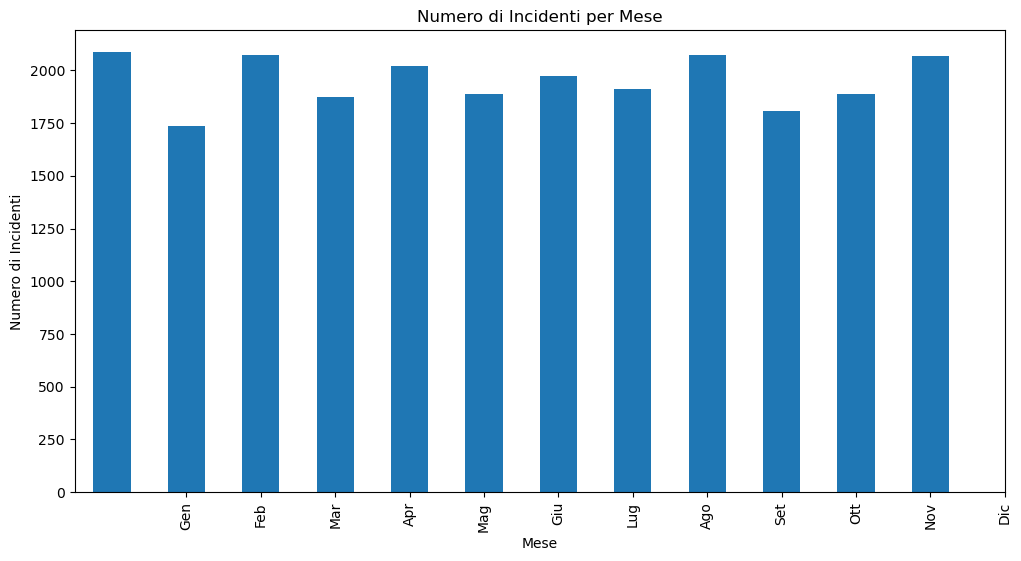

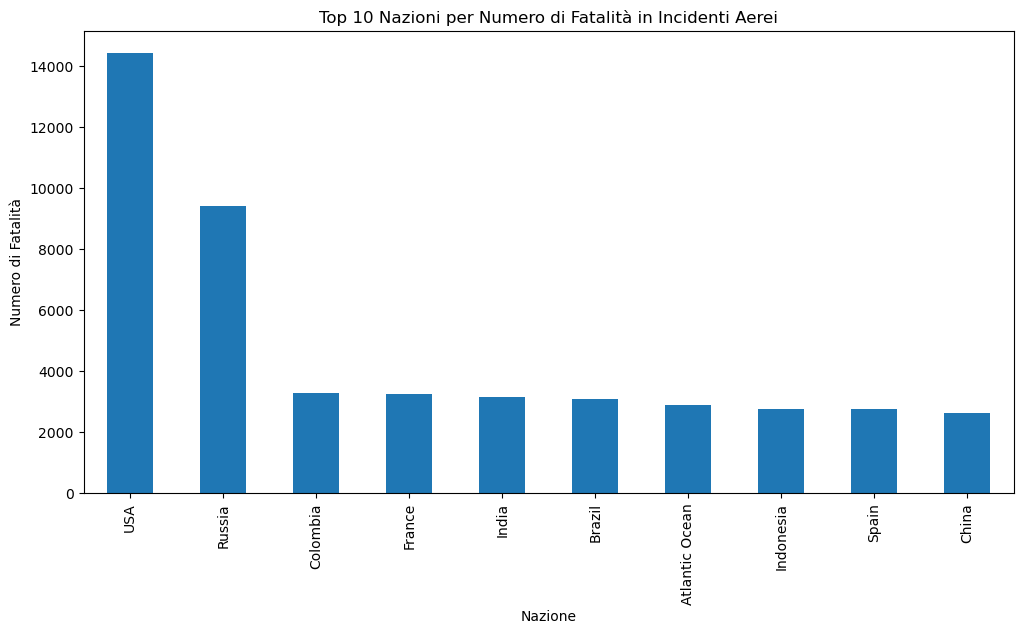

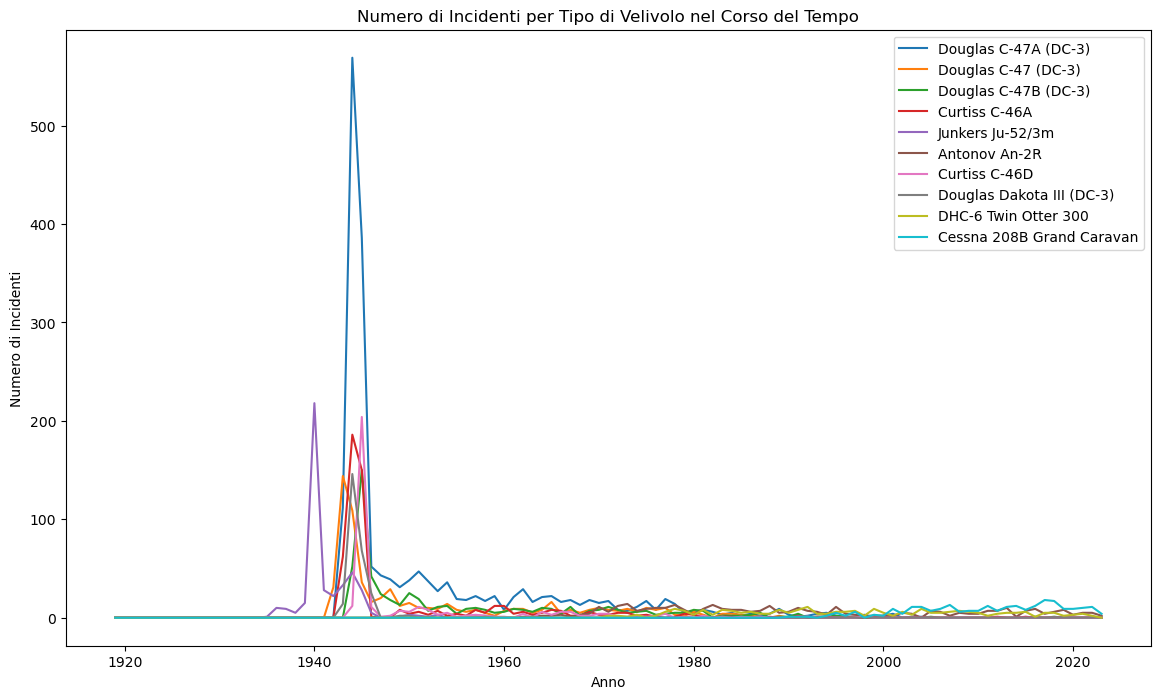

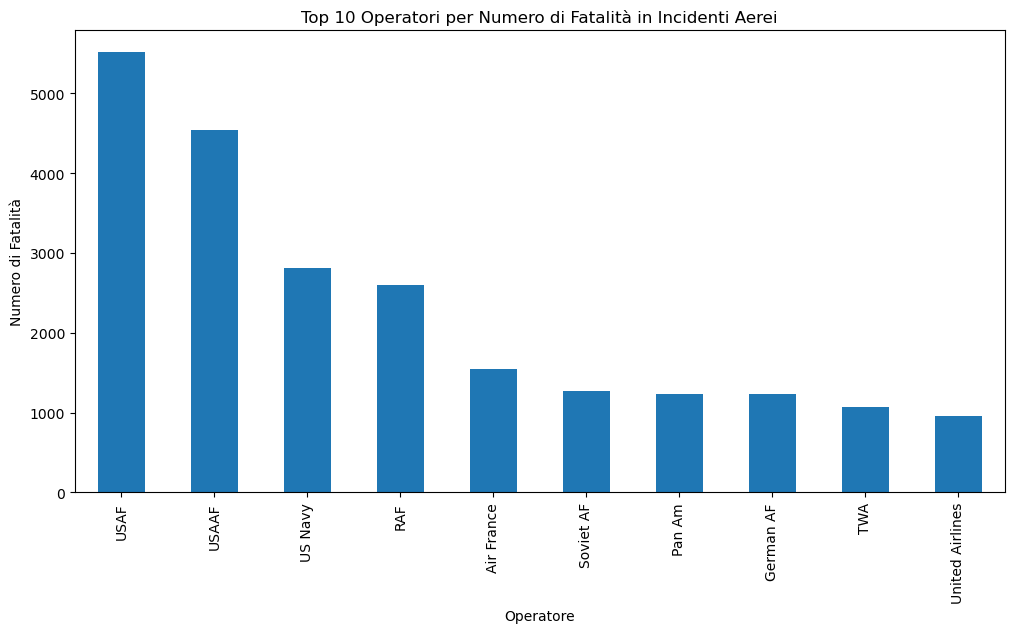

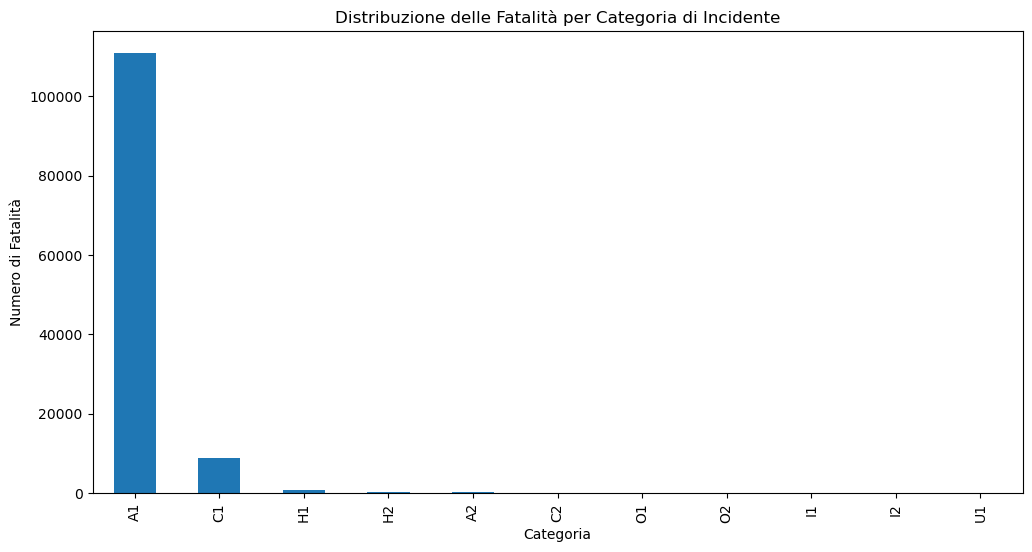

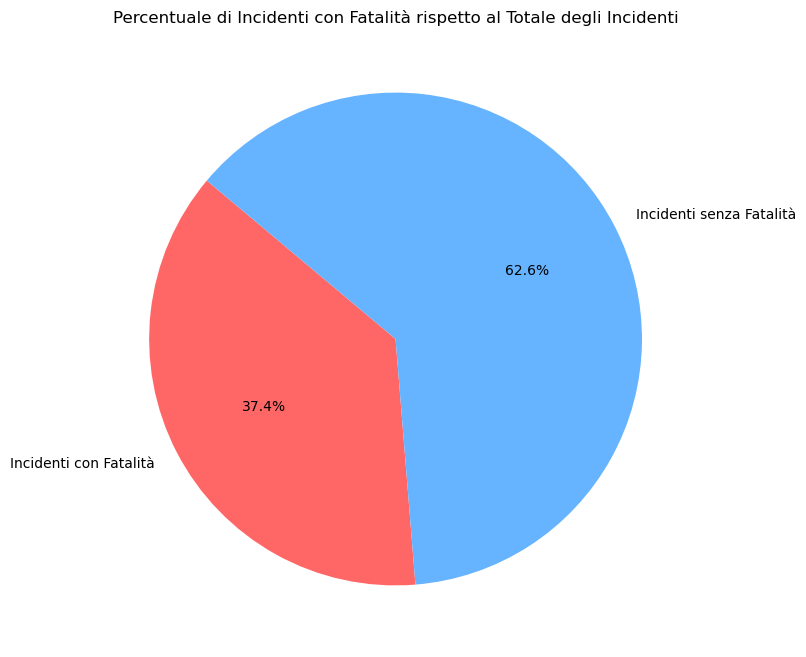

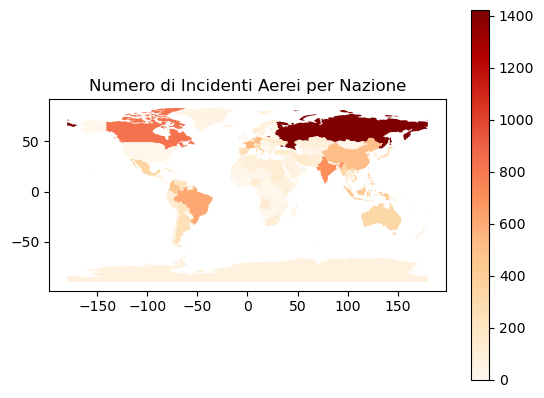

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

# Caricamento del dataset dal link
file_url = 'https://proai-datasets.s3.eu-west-3.amazonaws.com/aviation-accidents.csv'
df = pd.read_csv(file_url)

# Gestione dei valori mancanti e dei formati incompatibili
# Conversione della colonna 'date' in formato datetime e sostituzione valori non temporali con NaT
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%Y', errors='coerce')
# Riempimento valori mancanti con NaT 
df['date'] = df['date'].fillna(pd.NaT)

# Riempimento valori mancanti e sostituzione valori non numerici con 0
df['fatalities'] = pd.to_numeric(df['fatalities'], errors='coerce').fillna(0)

# Riempimento valori mancanti e sostituzione valori non stringa con 'Unknown'
string_columns = ['type', 'registration', 'operator', 'location', 'country', 'cat']
for col in string_columns:
    df[col] = df[col].astype(str).fillna('Unknown')

# Estrazione anno, mese e giorno della settimana
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.day_name()

# 1. Analisi delle nazioni per numero di incidenti aerei
incidents_by_country = df['country'].value_counts().head(10)
plt.figure(figsize=(12, 6))
incidents_by_country.plot(kind='bar')
plt.title('Top 10 Nazioni per Numero di Incidenti Aerei')
plt.xlabel('Nazione')
plt.ylabel('Numero di Incidenti')
plt.show()

# 2. Analisi degli incidenti per giorno della settimana
incidents_by_day = df['day_of_week'].value_counts()
plt.figure(figsize=(12, 6))
incidents_by_day.plot(kind='bar')
plt.title('Numero di Incidenti per Giorno della Settimana')
plt.xlabel('Giorno della Settimana')
plt.ylabel('Numero di Incidenti')
plt.show()

# 3. Analisi degli operatori con il minor numero di incidenti
incidents_by_operator = df['operator'].value_counts().tail(10)
plt.figure(figsize=(12, 6))
incidents_by_operator.plot(kind='bar')
plt.title('Top 10 Operatori più Sicuri')
plt.xlabel('Operatore')
plt.ylabel('Numero di Incidenti')
plt.show()

# 4. Analisi del tipo di velivolo che ha causato più morti
fatalities_by_type = df.groupby('type')['fatalities'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
fatalities_by_type.plot(kind='bar')
plt.title('Top 10 Tipi di Velivolo per Numero di Morti')
plt.xlabel('Tipo di Velivolo')
plt.ylabel('Numero di Morti')
plt.show()

# 5. Analisi dell'evoluzione degli incidenti dopo l'11 Settembre
pre_9_11 = df[df['date'] < '2001-09-11'].groupby('year').size()
post_9_11 = df[df['date'] >= '2001-09-11'].groupby('year').size()
plt.figure(figsize=(12, 6))
plt.plot(pre_9_11.index, pre_9_11.values, label='Prima dell\'11 Settembre 2001')
plt.plot(post_9_11.index, post_9_11.values, label='Dopo l\'11 Settembre 2001')
plt.title('Evoluzione degli Incidenti Aerei Prima e Dopo l\'11 Settembre 2001')
plt.xlabel('Anno')
plt.ylabel('Numero di Incidenti')
plt.legend()
plt.show()

# 6. Analisi del trend annuale degli incidenti e delle fatalità
incidents_per_year = df.groupby('year').size()
fatalities_per_year = df.groupby('year')['fatalities'].sum()
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
incidents_per_year.plot(kind='line')
plt.title('Numero di Incidenti Aerei per Anno')
plt.xlabel('Anno')
plt.ylabel('Numero di Incidenti')
plt.subplot(2, 1, 2)
fatalities_per_year.plot(kind='line', color='red')
plt.title('Numero di Fatalità Aeree per Anno')
plt.xlabel('Anno')
plt.ylabel('Numero di Fatalità')
plt.tight_layout()
plt.show()

# 7. Distribuzione degli incidenti per categoria 
incidents_by_category = df['cat'].value_counts()
plt.figure(figsize=(12, 6))
incidents_by_category.plot(kind='bar')
plt.title('Distribuzione degli Incidenti per Categoria')
plt.xlabel('Categoria')
plt.ylabel('Numero di Incidenti')
plt.show()

# 8. Analisi dei luoghi più frequenti degli incidenti
incidents_by_location = df['location'].value_counts().head(10)
plt.figure(figsize=(12, 6))
incidents_by_location.plot(kind='bar')
plt.title('Top 10 Località con più Incidenti Aerei')
plt.xlabel('Località')
plt.ylabel('Numero di Incidenti')
plt.show()

# 9. Analisi della stagione in cui avvengono più incidenti
incidents_by_month = df['month'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
incidents_by_month.plot(kind='bar')
plt.title('Numero di Incidenti per Mese')
plt.xlabel('Mese')
plt.ylabel('Numero di Incidenti')
plt.xticks(ticks=np.arange(1, 13), labels=['Gen', 'Feb', 'Mar', 'Apr', 'Mag', 'Giu', 'Lug', 'Ago', 'Set', 'Ott', 'Nov', 'Dic'])
plt.show()

# 10. Distribuzione delle fatalità per nazione
fatalities_by_country = df.groupby('country')['fatalities'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
fatalities_by_country.plot(kind='bar')
plt.title('Top 10 Nazioni per Numero di Fatalità in Incidenti Aerei')
plt.xlabel('Nazione')
plt.ylabel('Numero di Fatalità')
plt.show()

# 11. Analisi della tipologia di velivoli coinvolti negli incidenti nel corso del tempo
types_over_time = df.groupby(['year', 'type']).size().unstack(fill_value=0)
top_types = df['type'].value_counts().head(10).index
types_over_time = types_over_time[top_types]
plt.figure(figsize=(14, 8))
for col in types_over_time.columns:
    plt.plot(types_over_time.index, types_over_time[col], label=col)
plt.title('Numero di Incidenti per Tipo di Velivolo nel Corso del Tempo')
plt.xlabel('Anno')
plt.ylabel('Numero di Incidenti')
plt.legend()
plt.show()

# 12. Analisi degli operatori con il maggior numero di incidenti fatali
fatalities_by_operator = df.groupby('operator')['fatalities'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
fatalities_by_operator.plot(kind='bar')
plt.title('Top 10 Operatori per Numero di Fatalità in Incidenti Aerei')
plt.xlabel('Operatore')
plt.ylabel('Numero di Fatalità')
plt.show()

# 13. Distribuzione delle fatalità per categoria 
fatalities_by_category = df.groupby('cat')['fatalities'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
fatalities_by_category.plot(kind='bar')
plt.title('Distribuzione delle Fatalità per Categoria di Incidente')
plt.xlabel('Categoria')
plt.ylabel('Numero di Fatalità')
plt.show()

# 14. Analisi della percentuale di incidenti con fatalità rispetto al totale degli incidenti
fatal_incidents = df[df['fatalities'] > 0].shape[0]
total_incidents = df.shape[0]
labels = ['Incidenti con Fatalità', 'Incidenti senza Fatalità']
sizes = [fatal_incidents, total_incidents - fatal_incidents]
colors = ['#ff6666', '#66b3ff']
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentuale di Incidenti con Fatalità rispetto al Totale degli Incidenti')
plt.show()

# 15. Creazione di un cartogramma per rappresentare il numero di incidenti per nazione
# Caricamento della mappa mondiale scaricata da Natural Earth (https://www.naturalearthdata.com/downloads/110m-cultural-vectors/)
shapefile_path = r'C:\Users\Giandy\Desktop\profession ai\modulo 7\progetto\ne_110m_admin_0_countries\ne_110m_admin_0_countries.shp'
world = gpd.read_file(shapefile_path)

# Adattamento del nome della colonna per il merge
incidents_by_country_map = df['country'].value_counts().reset_index()
incidents_by_country_map.columns = ['country', 'incidents']

# Merge dei dati con il dataframe della mappa
world = world.merge(incidents_by_country_map, how='left', left_on='ADMIN', right_on='country')
world['incidents'] = world['incidents'].fillna(0)

# Creazione del cartogramma
world.plot(column='incidents', cmap='OrRd', legend=True)
plt.title('Numero di Incidenti Aerei per Nazione')
plt.show()
